# Ghost, Goblins & Ghouls competition

In [1]:
import pandas as pd
import numpy as np
import pylab as P
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Import data

In [2]:
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [4]:
df['type'].unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

Splitting Dataset into $X_{train}$, $y_{train}$, $X_{test}$, $y_{test}$

In [5]:
X = df.drop(['id', 'type'], axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.33)
X_train.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color
247,0.269748,0.627138,0.195365,0.367902,blue
111,0.476730,0.242420,0.294214,0.317795,black
123,0.505375,0.327578,0.650431,0.528015,green
322,0.217248,0.498718,0.331531,0.523283,white
244,0.391036,0.506061,0.252296,0.347765,black


# Logistic Regression
We perform logistic regression for different combination of alpha and polynomial degree evaluation to pick the best model. For that let's define few functions to help us out

In [6]:
def formatX(X, poly):
    #colors = pd.get_dummies(X['color'])
    X = poly.fit_transform(X.drop(['color'], axis=1).values)
    #X = pd.concat([pd.DataFrame(X), pd.DataFrame(colors.values)], axis=1)
    return X 

def formatY(y):
    return np.sum(np.array(pd.get_dummies(pd.DataFrame(y)['type']).values)*np.array([1, 2, 3]), axis=1)

def performLogisticRegression(X_train, y_train, alpha, poly):
    logreg = LogisticRegression(C=alpha)
    logreg.fit(formatX(X_train, poly), formatY(y_train))
    return logreg

def predict(model, X_test, poly):
    return model.predict(formatX(X_test, poly))

def generateOutCSV(model, poly):
    y_predict = predict(model, df_test.drop(['id'], axis=1), poly)
    df_predictions = pd.DataFrame({'id': df_test['id'] , 'type': y_predict})
    df_predictions['type'] = df_predictions['type'].apply(lambda type: types[type])
    df_predictions.to_csv('out.csv', index=False)
    
def plotScores(alphas, degrees, results):
    f, axarr = plt.subplots(len(alphas)//2, 2)
    f.tight_layout()
    for i in range(len(alphas)//2):
        for j in range(2):
            axarr[i, j].plot(degrees, results[i])
            title = 'Score pour alpha=' + str(alphas[2*i+j])
            axarr[i, j].set_title(title)
    plt.show()
    

In [7]:
#Ghost = 1 #Ghoul = 2 # Goblin = 3 According to yFormatting above
types = {1: 'Ghost', 2: 'Ghoul', 3: 'Goblin'}

degrees = np.linspace(1, 5, 5)
alphas = np.array([10, 100, 1000, 10000])
print(degrees, alphas)

[ 1.  2.  3.  4.  5.] [   10   100  1000 10000]


In [8]:
results = []
for alpha in alphas:
    scores = []
    for d in degrees:
        poly = PolynomialFeatures(int(d))
        model = performLogisticRegression(X_train, y_train, alpha, poly)
        y_predict = predict(model, X_test, poly)
        scores.append(model.score(formatX(X_test, poly), formatY(y_test)))
    results.append(scores)
print(results)

[[0.73170731707317072, 0.76422764227642281, 0.78048780487804881, 0.77235772357723576, 0.76422764227642281], [0.72357723577235777, 0.75609756097560976, 0.73983739837398377, 0.73983739837398377, 0.73983739837398377], [0.73170731707317072, 0.73983739837398377, 0.73983739837398377, 0.73983739837398377, 0.74796747967479671], [0.73170731707317072, 0.73983739837398377, 0.73983739837398377, 0.72357723577235777, 0.73170731707317072]]


Then we plot the scores according to the degrees and the alpha factor of linear regression to choose the right alpha and degree

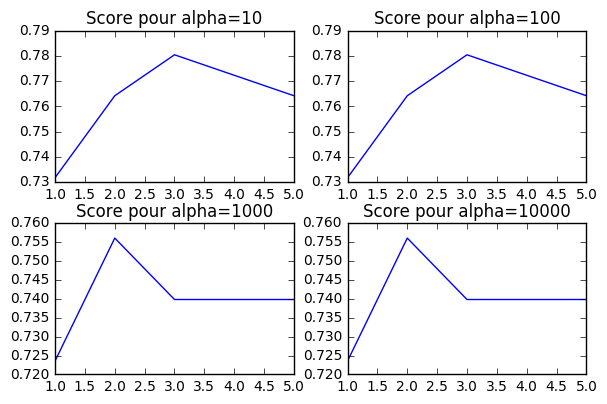

In [9]:
plotScores(alphas, degrees, results)

We choose degree = 3 and alpha = 100

In [10]:
degree = 3
alpha = 100

Then we perform the model linear regression for the choosen model

In [11]:
polyLog = PolynomialFeatures(degree)
modelLog = performLogisticRegression(X_train, y_train, alpha, poly)
y_predict = predict(model, X_test, poly)
model.score(formatX(X_test, poly), formatY(y_test)) # Score on validation SET

0.73170731707317072

In [12]:
generateOutCSV(model, poly)

### This model scored top 100 with 0.74102 score

# ACP
We do an ACP to see if a K-mean or CHA clustering algorithm could fit

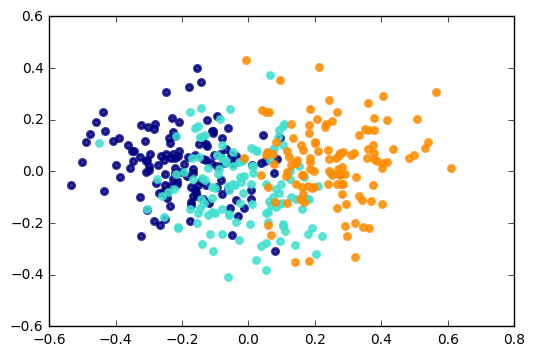

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = df.drop(['id', 'color', 'type'], axis=1).values
X_pca = pca.fit_transform(X_pca)
X_pca = pd.DataFrame(X_pca)
X_pca['type'] = df['type']

lw = 2
f = plt.figure()
types = ["Ghoul", "Goblin", "Ghost"]
colors = ['navy', 'turquoise', 'darkorange']
for color, type in zip(colors, types):
    X_tmp = np.array(X_pca[X_pca['type'] == type])
    plt.scatter(X_tmp[:, 0], X_tmp[:, 1], color=color, alpha=.8, lw=lw, label=type)
plt.show()

After performing ACP I chose not to follow this direction and not to perform a clustering algorithm. Instead I chose to go for a LeaveOneOut strategy. Indeed the training set is only 370 features long so let's see if there is place for improvement

# KFold Strategy (LeaveOneOut)

In [14]:
from sklearn.model_selection import LeaveOneOut

In [15]:
#Ghost = 1 #Ghoul = 2 # Goblin = 3 According to yFormatting above. We changed it for ACP
types = {1: 'Ghost', 2: 'Ghoul', 3: 'Goblin'}

X = df.copy()
loo = LeaveOneOut()
results = []
for alpha in alphas:
    scores = []
    for d in degrees:
        score = 0
        for train, test in loo.split(X):
            y_train = X.loc[train, :]['type']
            y_test = X.loc[test, :]['type']
            X_train = X.loc[train, :].drop(['id', 'type'], axis=1)
            X_test = X.loc[test, :].drop(['id', 'type'], axis=1)
            poly = PolynomialFeatures(int(d))
            model = performLogisticRegression(X_train, y_train, alpha, poly)
            y_predict = predict(model, X_test, poly)
            score = score + (types[y_predict[0]] == y_test).values[0]
        scores.append(score/len(X))
    results.append(scores)
print(results)

[[0.74932614555256061, 0.76280323450134768, 0.76010781671159033, 0.75741239892183287, 0.75471698113207553], [0.7439353099730458, 0.74932614555256061, 0.74123989218328845, 0.73854447439353099, 0.74663072776280326], [0.75202156334231807, 0.73854447439353099, 0.74123989218328845, 0.74123989218328845, 0.74663072776280326], [0.75202156334231807, 0.73584905660377353, 0.74932614555256061, 0.74663072776280326, 0.73854447439353099]]


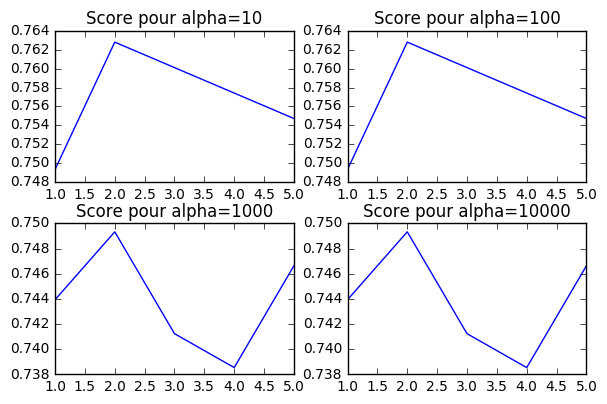

In [16]:
plotScores(alphas, degrees, results)

On choisit alpha = 100 et d = 2

In [17]:
alpha = 100
d = 2

X_train = X.drop(['id', 'type'], axis=1)
y_train = X['type']
poly = PolynomialFeatures(degree)
model = performLogisticRegression(X_train, y_train, alpha, poly)
generateOutCSV(model, poly)

### Top 70 entry 0.72291 (+ 0.00189 par rapport à l'entrée précédente)

Next step is to implement a neural network or try other models than polynomial for logistic regression